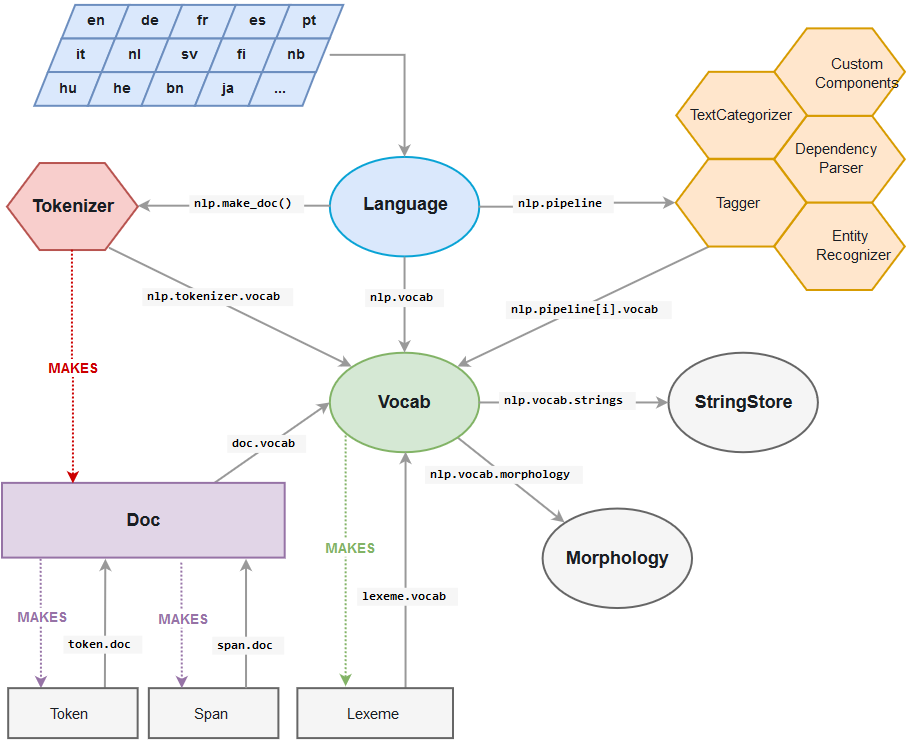

In [27]:
import re 

flist_th = []
flist_tr = []
tot_rec = 0
threat_rec = 0
traffic_rec = 0
discard_rec = 0
with open("palo_sample_30.txt","r") as file:
    file_th = open("threat_file.txt","a")
    file_th.truncate(0)
    file_tr = open("traffic_file.txt","a")
    file_tr.truncate(0)
    for fline in file.readlines():
        tot_rec+=1
        fline = re.sub(r'[^a-zA-Z0-9\n\/.:,_\s-]','',fline).lower()
        flist = fline.split(",")
        if (flist[3] == 'threat'):
            flist_th.append(flist)
            file_th.write(fline)
            threat_rec+=1
        elif(flist[3] == 'traffic'):
            flist_tr.append(flist)
            file_tr.write(fline)
            traffic_rec+=1
        else:
            discard_rec+=1
file_th.close()
file_tr.close()

In [28]:
print("Total records:",tot_rec)
print("Threat records:",threat_rec)
print("Traffic records:",traffic_rec)
print("Discarded records:",discard_rec)
print("Processed records:",(threat_rec+traffic_rec))

Total records: 29
Threat records: 8
Traffic records: 20
Discarded records: 1
Processed records: 28


In [29]:
def line_tagging(fline,tag_list):
    tag_len = len(tag_list)
    ent_list =[]
    tmp=''
    k=0
    #preprocessing file to remove punctuation    
    for i in range(len(fline)):
        end_pos = i
        if (fline[i] == (" " or "\n")):    
            if (k < tag_len):
                tag_tup = (abs(len(tmp)-i),i,tag_list[k])
                if (tag_list[k] != 'NA') and (abs(len(tmp)-i)<i):
                    ent_list.append(tag_tup)
                k+=1
                tmp=''
            else:
                print("Tagging Complete")
                break
        else:
            tmp+=fline[i]
        
    if (k < tag_len):
        if tmp:
            tag_tup = (tmp,abs(len(tmp)-(end_pos+1)),end_pos+1,tag_list[k])
            ent_list.append(tag_tup)
    return ent_list

In [30]:
threat_tag = ['Header','Received Time','Serial Number','Log Type','Subtype','FUTURE USE','Generated Time','Source IP',
              'Destination IP','NAT Source IP','NAT Destination IP','Rule Name','Source User','Destination User',
              'Application','Virtual system','Source zone','Destination zone','Ingress Interface','Egress Interface',
              'Log forwarding profile','FUTURE USE','Session ID','Repeat count','Source Port','Destination Port',
              'NAT Source Port','NAT Destination Port','Flags','IP Protocol','Action','Miscellaneous','Threat ID',
              'Category','Severity','Direction','Sequence Number','Action Flags','Source Location','Destination Location ',
              'FUTURE USE','Content Type','PCAP_ID','Filedigest','Cloud','URL Index','User Agent','File Type',
              'X-Forwarded-For','Referer','Sender','Subject','Recepient','Report ID','Device Group Hierarchy Level 1',
              'Device Group Hierarchy Level 2','Device Group Hierarchy Level 3','Device Group Hierarchy Level 4',
              'Virtual System Name','Device Name','FUTURE USE']

threat_tag_few_map = ['NA','TSTAMP','SRNO','LOGTYP','SUBTYP','NA','TSTAMP','SIPADDR',
              'DIPADDR','NSIPADDR','NDIPADDR','NA','SUSER','DUSER',
              'NA','NA']

threat_tag_ = ['HDR-M','HDR-D','HDR-T','HDR-IP','HDR-M','HDR-D','HDR-T','HDR-DN','HDR-CNT','RCVD-DT','RCVD-TM','SRNO','LTYP','SBTYP','FTRUSE',
              'GNRT-DT','GNRT-TM','SRCIP','DSTIP','NATSIP','NATDIP','RULNM','SUSR','DUSR']

In [31]:
#   list[tuple('line',dict{'entities':list[tuple((start_pos,end_pos,'TAG'),...)]})]
with open("threat_file.txt","r") as file_th:
    th_l_cnt=0
    th_line_list=[]
    th_line_tup=()
    for line in file_th:
        line = line.replace(","," ")
        th_l_cnt +=1
        th_ent_dict={"entities":[]}
        th_ent_tup=()
        th_tag_tup=()
        th_ent_list = line_tagging(line,threat_tag_)
        th_ent_dict["entities"] = th_ent_list
        th_line_tup = (line,th_ent_dict)
        th_line_list.append(th_line_tup)
#print(th_line_list[0])

Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete


In [32]:
traffic_tag = ['Header','Received Time','Serial Number','Log Type','Subtype','FUTURE USE','Generated Time',
                'Source IP','Destination IP','NAT Source IP','NAT Destination IP','Rule Name','Source User',
                'Destination User','Application','Virtual system','Source zone','Destination zone','Ingress Interface',
                'Egress Interface','Log forwarding profile','FUTURE USE','Session ID','Repeat count','Source Port',
                'Destination Port','NAT Source Port','NAT Destination Port','Flags','IP Protocol','Action',
                'Bytes','Bytes Sent','Bytes Received','Packets','Start Time','Elapse Time','Category',
                'FUTURE USE','Sequence Number','Action Flag','Source Location','Destination Location',
                'FUTURE USE','Packets Sent','Packets Received','Session End Reason',
                'Device Group Hierarchy Level 1','Device Group Hierarchy Level 2',
                'Device Group Hierarchy Level 3','Device Group Hierarchy Level 4','Virtual Sytem name',
                'Device Name','Action Source']

traffic_tag_few_map = ['NA','TSTAMP','SRNO','LOGTYP','SUBTYP','NA','TSTAMP','SIPADDR',
              'DIPADDR','NSIPADDR','NDIPADDR','NA','SUSER','DUSER',
              'NA','NA']

traffic_tag_ = ['HDR-M','HDR-D','HDR-T','HDR-IP','HDR-M','HDR-D','HDR-T','HDR-DN','HDR-CNT','RCVD-DT','RCVD-TM','SRNO','LTYP','SBTYP','FTRUSE',
              'GNRT-DT','GNRT-TM','SRCIP','DSTIP','NATSIP','NATDIP','RULNM','SUSR','DUSR']

In [33]:
# list[tuple('line',dict{'entities':list[tuple((start_pos,end_pos,'TAG'),...)]})]
with open("traffic_file.txt","r") as file_tr:
    tr_l_cnt=0
    tr_line_list=[]
    tr_line_tup=()
    for line in file_tr:
        line = line.replace(","," ")
        tr_l_cnt +=1
        tr_ent_dict={"entities":[]}
        tr_ent_tup=()
        tr_tag_tup=()
        tr_ent_list = line_tagging(line,traffic_tag_)
        tr_ent_dict["entities"] = tr_ent_list
        tr_line_tup = (line,tr_ent_dict)
        tr_line_list.append(tr_line_tup)
print("Line Processed :",tr_l_cnt)
#print(tr_line_list[0])

Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Tagging Complete
Line Processed : 20


In [34]:
total_list=[]
total_list.extend(th_line_list)
total_list.extend(tr_line_list)
#print(total_list)

In [35]:
# Train-Test Split
train_split = int(len(total_list)*0.7)
train_list = total_list[0:train_split]
test_list = total_list[train_split:]
print(len(train_list))
print(len(test_list))

19
9


In [10]:
import spacy
import en_core_web_sm as en
print(spacy.__version__)
print(en.__version__)
import pandas as pd
import numpy as np

from pathlib import Path
from spacy import displacy

3.0.5
3.0.0


In [11]:
# Define our variables
model = None
output_dir=Path("C://Users//anarayan//models//ner_spacy_palo_model")
n_iter=10

In [12]:
import warnings
warnings.filterwarnings("ignore")
import random
from spacy.util import minibatch, compounding
from spacy.training import Example

def train_ner(train_data,n_iter):
    #Create a blank NLP model object
    #Create and add ner to the nlp model
    #Add labels from training data
    TRAIN_DATA = train_data
    if model is not None:
        nlp = spacy.load(model) #load existing model
        print("Loaded model is:",model)
    else:
        nlp = spacy.blank("en") #create blank language class
        print("Created a blank 'en' model")

    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe("ner", last=True)
        print("Added ner pipe into empty nlp model object")
    else:
        ner = nlp.get_pipe("ner")
    
    for _,annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])
    
    print("Pipes Present:", nlp.pipe_names)
    #disabled_pipes = [pipe for pipe in nlp.pipe_names if pipe not in ('ner','tok2vec')]
    disabled_pipes = [pipe for pipe in nlp.pipe_names if pipe not in ('ner')]
    print("Pipes Disabled:", disabled_pipes)
    
    with nlp.disable_pipes(*disabled_pipes):  # only train NER
        if model is None:
            print("Begin Training")
            optimizer = nlp.begin_training()
        else:
            print("Resume Training")
            optimizer = nlp.resume_training()

        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses={}
            #batch up the example using Spacy's minibatch
            for batch in minibatch(TRAIN_DATA, size=compounding(4,32,1.001)):
                for text,annotation in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc,annotation)
                    nlp.update([example]
                               ,losses=losses
                               ,drop=0.4
                               ,sgd=optimizer)
            print(f'Loss in iter {itn} is {losses}')
            
    return nlp

In [13]:
nlp = train_ner(train_list,20)

Created a blank 'en' model
Added ner pipe into empty nlp model object
Pipes Present: ['ner']
Pipes Disabled: []
Begin Training
Loss in iter 0 is {'ner': 1435.0034369637333}
Loss in iter 1 is {'ner': 535.9750138177225}
Loss in iter 2 is {'ner': 361.65708663463136}
Loss in iter 3 is {'ner': 241.72092718414183}
Loss in iter 4 is {'ner': 153.48565338203304}
Loss in iter 5 is {'ner': 79.69228091059017}
Loss in iter 6 is {'ner': 49.47982137363803}
Loss in iter 7 is {'ner': 28.086684610189838}
Loss in iter 8 is {'ner': 144.9689573116423}
Loss in iter 9 is {'ner': 122.9838997498148}
Loss in iter 10 is {'ner': 81.53572505156689}
Loss in iter 11 is {'ner': 18.47151486445456}
Loss in iter 12 is {'ner': 7.472978267037354}
Loss in iter 13 is {'ner': 11.922093203120845}
Loss in iter 14 is {'ner': 7.572611043847975}
Loss in iter 15 is {'ner': 4.707025063357629}
Loss in iter 16 is {'ner': 2.2409472957075356}
Loss in iter 17 is {'ner': 1.8190034498136955}
Loss in iter 18 is {'ner': 0.9957227637634807}


In [14]:
def count_ent(ent_list):
    unq_ent_set = set(ent_list)
    ent_dict = {}
    for x in unq_ent_set:
        ent_dict.update({x:ent_list.count(x)})
    return ent_dict

In [15]:
act_ent_list = []
for text, annot in test_list:
    text = text.replace(","," ")
    for ent in annot.get('entities'):
        act_ent_list.append(ent[2])

act_ent_dict = count_ent(act_ent_list)
print("Actual Entity from Test file :",act_ent_dict)

Actual Entity from Test file : {'HDR-IP': 9, 'RCVD-DT': 9, 'GNRT-TM': 9, 'HDR-D': 18, 'SRCIP': 9, 'RCVD-TM': 9, 'DSTIP': 9, 'SUSR': 8, 'SRNO': 9, 'RULNM': 9, 'SBTYP': 9, 'HDR-DN': 9, 'LTYP': 9, 'GNRT-DT': 9, 'NATSIP': 9, 'HDR-CNT': 9, 'HDR-M': 18, 'FTRUSE': 9, 'NATDIP': 9, 'HDR-T': 18}


In [16]:
pred_ent_list = [] 
for line,ent in test_list:
    line = line.replace(","," ")
    doc = nlp(line)
    [pred_ent_list.append(ent.label_) for ent in doc.ents]

pred_ent_dict = count_ent(pred_ent_list)
print("Predicted Entity from Test file :",pred_ent_dict)

Predicted Entity from Test file : {'HDR-IP': 9, 'RCVD-DT': 9, 'GNRT-TM': 9, 'HDR-D': 18, 'SRCIP': 9, 'RCVD-TM': 9, 'DSTIP': 9, 'SUSR': 7, 'SRNO': 9, 'RULNM': 9, 'SBTYP': 9, 'HDR-DN': 9, 'LTYP': 9, 'GNRT-DT': 9, 'NATSIP': 9, 'HDR-CNT': 9, 'HDR-M': 18, 'FTRUSE': 9, 'NATDIP': 9, 'HDR-T': 18}


In [17]:
# save model to output directory
if output_dir is not None:
    output_dir = Path(output_dir)
if not output_dir.exists():
    output_dir.mkdir()
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to C:\Users\anarayan\models\ner_spacy_palo_model


In [18]:
# test the saved model
print("Loading from", output_dir)
test_nlp = spacy.load(output_dir)

Loading from C:\Users\anarayan\models\ner_spacy_palo_model


In [19]:
df_list = []

for i in range(len(test_list)):
    test_text = test_list[i][0]
    test_annot_dict = dict(test_list[i][1])
    test_doc = test_nlp(test_text)
    for k,v in test_annot_dict.items():
        for v_i in range(len(v)):
            start_pos = v[v_i][0]
            end_pos = v[v_i][1]
            tag = v[v_i][2]
            df_list.append([(i+1),test_text[start_pos:end_pos],tag])        

test_df = pd.DataFrame(df_list,columns=['Idx','Token','Actual_Tag'])


In [36]:
#print(test_df[test_df['Idx']==1])

In [21]:
pred_list = []

for i in range(len(test_list)):
    test_text = test_list[i][0]
    test_doc = test_nlp(test_text)
    for ent in test_doc.ents:
        pred_list.append([(i+1),ent.text,ent.label_])        

pred_df = pd.DataFrame(pred_list,columns=['Idx','Token','Predicted_Tag'])

In [37]:
#print(pred_df[pred_df['Idx']==1])

In [23]:
final_df = pd.merge(test_df,pred_df,on=['Idx','Token'],how='outer')

In [24]:
final_df.to_csv('final_df.csv')

In [25]:
y_pred=final_df['Predicted_Tag'].tolist()
y_actual=final_df['Actual_Tag'].tolist()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

       DSTIP       0.50      0.50      0.50        18
      FTRUSE       1.00      1.00      1.00         9
     GNRT-DT       0.50      0.50      0.50        18
     GNRT-TM       0.50      0.50      0.50        18
     HDR-CNT       1.00      1.00      1.00         9
       HDR-D       1.00      1.00      1.00        36
      HDR-DN       1.00      1.00      1.00         9
      HDR-IP       1.00      1.00      1.00         9
       HDR-M       1.00      1.00      1.00        36
       HDR-T       1.00      1.00      1.00        18
        LTYP       1.00      1.00      1.00         9
      NATDIP       0.50      0.50      0.50        18
      NATSIP       1.00      1.00      1.00         9
     RCVD-DT       0.50      0.50      0.50        18
     RCVD-TM       0.50      0.50      0.50        18
       RULNM       1.00      1.00      1.00         9
       SBTYP       1.00      1.00      1.00         9
       SRCIP       1.00    